In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!git clone https://github.com/Nancy-Amr/Computer-Vision-Project


Cloning into 'Computer-Vision-Project'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 2.15 MiB | 7.48 MiB/s, done.


In [ ]:
!pip install opencv-python-headless


Saving project image.png to project image (7).png


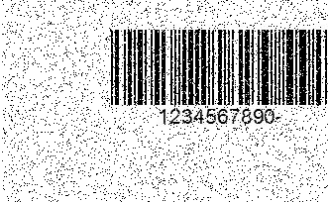

In [97]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
import numpy as np
from matplotlib import pyplot as plt

uploaded = files.upload()
image = cv2.imread("./project image.png")
cv2_imshow(image)

(204, 330)


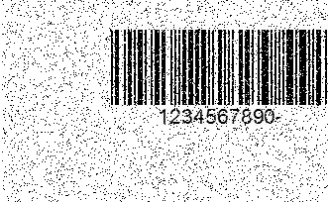

In [98]:
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(img_gray.shape)
cv2_imshow(img_gray)

Bounding box: min_x=104, max_x=326, min_y=30, max_y=104


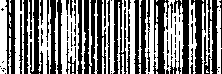

In [111]:

def Remove_Salt_Pepper(img_gray):
    denoised_img = cv2.bilateralFilter(img_gray, 3, 150, 150)
    thresh = cv2.adaptiveThreshold(denoised_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 91, 19)
    return thresh
processed_img = Remove_Salt_Pepper(img_gray)
# cv2_imshow(processed_img)

# def open_close(img_gray):
#     kernel = np.ones((3, 3), np.uint8)
#     opening = cv2.morphologyEx(img_gray, cv2.MORPH_OPEN, kernel)
#     closing1 = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
#     opening1 = cv2.morphologyEx(closing1, cv2.MORPH_OPEN, kernel)
#     closing = cv2.morphologyEx(opening1, cv2.MORPH_CLOSE, kernel)
#     return closing
# processed_img = open_close(processed_img)
# cv2_imshow(processed_img)


# def unsharp_mask(image, sigma=1.0, strength=1.5):
#     # Apply Gaussian blur
#     blurred = cv2.GaussianBlur(image, (0, 0), sigma)
#     # Subtract the blurred image from the original
#     sharpened = cv2.addWeighted(image, 1.0 + strength, blurred, -strength, 0)
#     return sharpened
# sharpened_image = unsharp_mask(img_gray)
# cv2_imshow(sharpened_image)

# # Apply unsharp masking
# sharpened_image = unsharp_mask(image)
# # Save the result
# cv2.imwrite('sharpened_image.jpg', sharpened_image)


# def find_contours(image):

#   _, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

#   contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#   cv2.drawContours(image, contours, -1, (0, 255, 0), 3)
#   return image
# contours = find_contours(processed_img)
# cv2_imshow(contours)


def cropped_image(image):
  # # Convert image to grayscale if it's not already
  #   if len(image.shape) == 3:
  #       image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  #   else:
  #       image_gray = image

    # # Remove noise using the denoising function
    # processed_img = Remove_Salt_Pepper(image)
    # cv2_imshow (processed_img)

    # Use Canny edge detection
    edges = cv2.Canny(processed_img, 50, 150)  # You can adjust these thresholds

    # Detect both vertical and horizontal lines using Hough Line Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=200, maxLineGap=10)

    # Initialize bounding box coordinates
    min_x, max_x, min_y, max_y = float('inf'), -float('inf'), float('inf'), -float('inf')

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            # Detect vertical and horizontal lines
            if abs(x1 - x2) < 10:  # Vertical lines
                min_x = min(min_x, x1)
                max_x = max(max_x, x1)
                min_y = min(min_y, y1, y2)
                max_y = max(max_y, y1, y2)
            elif abs(y1 - y2) < 10:  # Horizontal lines
                min_x = min(min_x, x1, x2)
                max_x = max(max_x, x1, x2)
                min_y = min(min_y, y1)
                max_y = max(max_y, y1)

    # Debugging: Print detected bounding box coordinates
    print(f"Bounding box: min_x={min_x}, max_x={max_x}, min_y={min_y}, max_y={max_y}")

    # Crop the barcode region if valid lines were detected
    if min_x != float('inf') and max_x != -float('inf') and min_y != float('inf') and max_y != -float('inf'):
        cropped = image[min_y:max_y, min_x:max_x]
        return cropped
    else:
        # If no lines detected, return the original image
        return image


# # Check if the image is loaded correctly
# if img_gray is None:
#     print("Error: Image not found.")
# else:
#     # Process and crop the image
#     cropped = cropped_image(img_gray)

#     # Debugging: Check the dimensions of the cropped image
#     print(f"Cropped image size: {cropped.shape}")

#     # Show the cropped image if it's not empty
#     if cropped.shape[0] > 0 and cropped.shape[1] > 0:
#         cv2_imshow(cropped)
#     else:
#         print("Error: Cropped image is empty.")
cropped_image = cropped_image(processed_img)
cv2_imshow(cropped_image)



